In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import unique
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import Birch
from sklearn.cluster import DBSCAN
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import OPTICS
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics                                
import os

In [3]:
data = pd.read_csv('C:/Users/mohtm/OneDrive/Desktop/AI Alg Project/Mall_Customers.csv', index_col=0)
data.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [4]:
data.drop(['Genre'], axis=1, inplace=True)
data.drop(['Age'], axis=1, inplace=True)

data.head()

,Annual Income (k$),Spending Score (1-100)
CustomerID,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40


Taking Full Fraction of Data
It shuffles the data

In [5]:
data = data.sample(frac=1)

In [6]:
data.head()

,Annual Income (k$),Spending Score (1-100)
CustomerID,,
190,103,85
26,28,82
92,59,41
134,72,71
167,86,20


K-Means

In [7]:
k_means = KMeans(n_clusters=2)
k_means.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [8]:
#Labels

In [9]:
k_means.labels_

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0])

In [10]:
np.unique(k_means.labels_)

array([0, 1])

In [11]:
centers = k_means.cluster_centers_
centers

array([[37.28888889, 50.28888889],
       [79.6       , 50.12727273]])

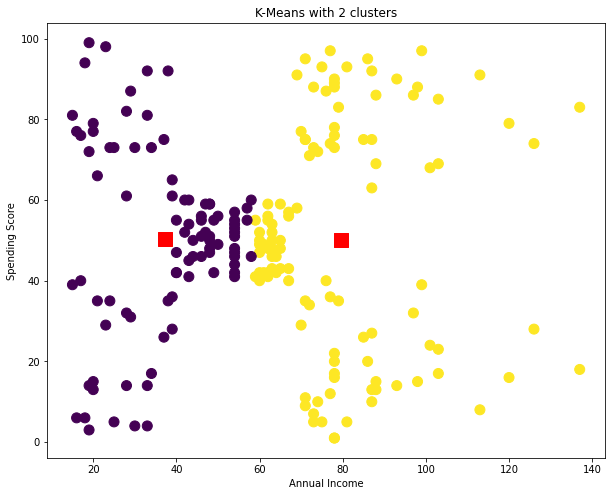

In [12]:
plt.figure(figsize=(10, 8))

plt.scatter(data['Annual Income (k$)'], 
            data['Spending Score (1-100)'], 
            c=k_means.labels_, s=100)

plt.scatter(centers[:,0], centers[:,1], color='red', marker='s', s=200) 

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('K-Means with 2 clusters')

plt.show()

A proportion of how comparable a point is to different focuses in its own bunch and how extraordinary it is from focuses in different groups.

In [13]:
from sklearn.metrics import silhouette_score

score = silhouette_score (data, k_means.labels_)

print("Score = ", score)

Score =  0.29689691625030085


Text(0.5, 1.0, 'Elbow plot for optimal number of clusters')

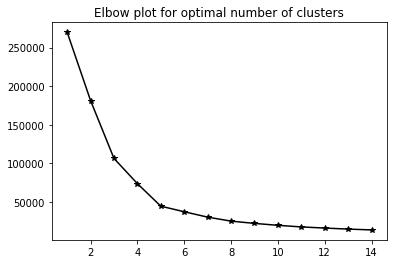

In [14]:
wscc = []
for i in range(1,15): 
    kmeans = KMeans(n_clusters=i, init="k-means++",random_state=0)
    kmeans.fit(data)
    wscc.append(kmeans.inertia_)  

plt.plot(range(1,15),wscc,marker="*",c="black")
plt.title("Elbow plot for optimal number of clusters")

In [15]:
#KMeans clustering with 5 clusters

In [16]:
k_means = KMeans(n_clusters=5)
k_means.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [17]:
np.unique(k_means.labels_)

array([0, 1, 2, 3, 4])

In [18]:
centers = k_means.cluster_centers_

centers

array([[86.53846154, 82.12820513],
       [55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636]])

In [19]:
#Displaying Data in 5 cluster form

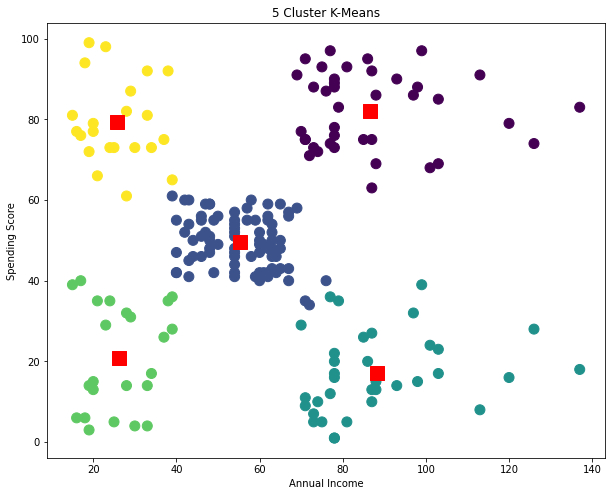

In [20]:
plt.figure(figsize=(10, 8))

plt.scatter(data['Annual Income (k$)'], 
            data['Spending Score (1-100)'], 
            c=k_means.labels_, s=100)

plt.scatter(centers[:,0], centers[:,1], color='red', marker='s', s=200) 

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('5 Cluster K-Means')

plt.show()

This is a better measure to decide the number of clusters to be formulated from the data.

In [21]:
score = metrics.silhouette_score(data, k_means.labels_)

print("Score = ", score)

Score =  0.553931997444648


This function returns the Silhouette Coefficient for each sample.

The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters.

In [22]:
score1 = metrics.silhouette_samples(data, k_means.labels_, metric='euclidean')
print("Score = ", score1)

Score =  [ 0.59982837  0.70488566  0.66933998  0.2254125   0.60779683  0.09342298
  0.57952023  0.6713546   0.64243997  0.68149135  0.65391468  0.00351627
  0.54953967  0.41700493  0.64167396  0.69181748  0.62355268  0.64910316
  0.46477526  0.68003912  0.10184214  0.66126882  0.57400953  0.74072908
  0.66547762  0.55652321  0.48286026  0.65267375  0.0507214   0.56463752
  0.52897452  0.4988398   0.61371866  0.38841392  0.30155503  0.37332421
  0.67809813  0.54460203  0.46593537  0.31116673  0.63322429  0.54589636
  0.73196104  0.48547142  0.53671842  0.39230007  0.51997874  0.46597803
  0.49666181  0.42116018  0.38313815  0.71071231  0.63780859  0.36620886
  0.47652583  0.58338266  0.74842791  0.61775968  0.69903269  0.7479776
  0.63883859  0.5718828   0.5718828   0.48378692  0.61933811  0.48931822
  0.57181215  0.70652524  0.57697817  0.61822335  0.63100118  0.71987017
  0.68358333  0.48194179  0.65368602  0.66873928  0.6399526   0.72079722
  0.51127799  0.32604311  0.43312564  0.684

Affinitty propagation

It involves in finding a set of exemplars that best summarize the data

In [23]:
model_aff = AffinityPropagation(damping=0.9)
model_aff.fit(data)
yhat_aff = model_aff.predict(data)
clusters_aff = unique(yhat_aff)
print("Clusters of Affinity Prop.",clusters_aff)
labels_aff = model_aff.labels_
centroids_aff = model_aff.cluster_centers_

Clusters of Affinity Prop. [0 1 2 3 4 5 6 7 8 9]


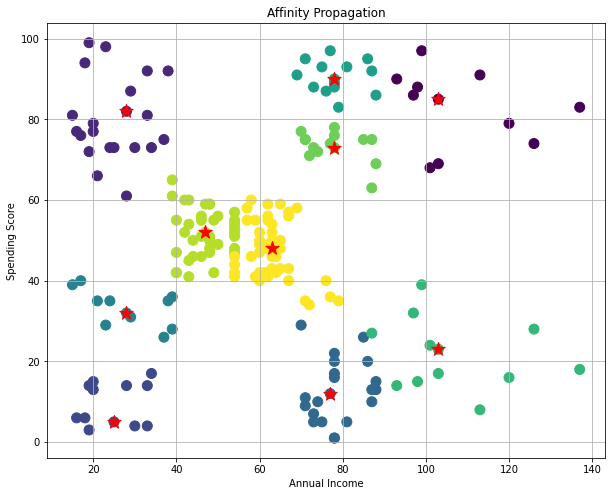

In [24]:
plt.figure(figsize=(10, 8))

plt.scatter(data['Annual Income (k$)'], 
            data['Spending Score (1-100)'], 
            c=labels_aff, s=100)

plt.scatter(centroids_aff[:,0], centroids_aff[:,1], color='red', marker='*', s=200) 

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Affinity Propagation')
plt.grid()
plt.show()

In [25]:
score_aff = metrics.silhouette_score(data,labels_aff)

print("Affinity Propagation Score= ", score_aff)

Affinity Propagation Score=  0.44379316692197884


BIRCH
Full Form is Balanced Irerative Reducing and Clustering using Heirarchies
It involves in constructing a tree structure from which cluster centroids are extracted

In [26]:
model_br = Birch(threshold=0.01, n_clusters=5)
model_br.fit(data)
yhat_br = model_br.predict(data)
clusters_br = unique(yhat_br)
print("Clusters of Birch",clusters_br)
labels_br = model_br.labels_

Clusters of Birch [0 1 2 3 4]


In [27]:
score_br = metrics.silhouette_score(data,labels_br)

print("Score of Birch = ", score_br)

Score of Birch =  0.5529945955148897


DBSCAN
Full Form is Density-Based Spatial Clustering of Applications with Noise
It is involved in finding high-density areas in the domain and expanding those areas of the feature around them as clusters

In [28]:
from numpy import unique
from numpy import where
data_X = data.iloc[:,[0,1]].values

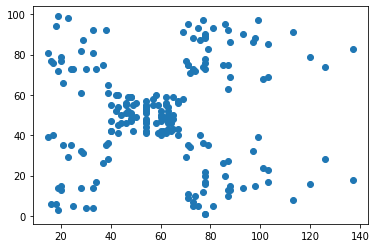

In [30]:
# define the model
model = DBSCAN(eps=0.7, min_samples=90)

# fit model and predict clusters
yhat = model.fit_predict(data_X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	plt.scatter(data_X[row_ix, 0], data_X[row_ix, 1])
# show the plot
plt.show()

Mini Batch K-Means, it is a modified version of k-means that makes updates to the cluster centroids using mini-batches of samples rather than the entire dataset, which can make it faster for latge datasets.

In [31]:
model_mini = MiniBatchKMeans(n_clusters=2)
model_mini.fit(data)
#
yhat_mini = model_mini.predict(data)
clusters_mini = unique(yhat_mini)
print("Clusters of Mini Batch KMeans.",clusters_mini)
labels_mini = model_mini.labels_
centroids_mini = model_mini.cluster_centers_

Clusters of Mini Batch KMeans. [0 1]


Text(0.5, 1.0, 'Elbow plot for Mini Batch KMeans')

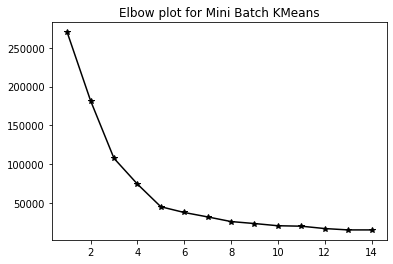

In [32]:
wscc = []
for i in range(1,15): 
    mkmeans = MiniBatchKMeans(n_clusters=i, init="k-means++",random_state=0)
    mkmeans.fit(data)
    wscc.append(mkmeans.inertia_)  

plt.plot(range(1,15),wscc,marker="*",c="black")
plt.title("Elbow plot for Mini Batch KMeans")


In [33]:
model_mini = MiniBatchKMeans(n_clusters=5)
model_mini.fit(data)
#
yhat_mini = model_mini.predict(data)
clusters_mini = unique(yhat_mini)
print("Clusters of Mini Batch KMeans.",clusters_mini)
labels_mini = model_mini.labels_
centroids_mini = model_mini.cluster_centers_


Clusters of Mini Batch KMeans. [0 1 2 3 4]


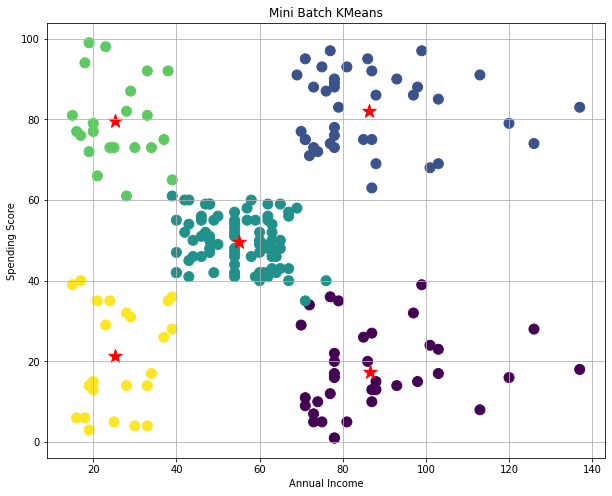

In [34]:
plt.figure(figsize=(10, 8))

plt.scatter(data['Annual Income (k$)'], 
            data['Spending Score (1-100)'], 
            c=labels_mini, s=100)

plt.scatter(centroids_mini[:,0], centroids_mini[:,1], color='red', marker='*', s=200) 

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Mini Batch KMeans')
plt.grid()
plt.show()


In [35]:
score_mini = metrics.silhouette_score(data,labels_mini)

print("Score of Birch = ", score_mini)


Score of Birch =  0.5532176107575425


Mean Shift, it is a clustering which involves in finding and adapting centroids based on the density of examples in the feature space

In [36]:
model_ms = MeanShift(bandwidth=25)
model_ms.fit(data)
#
yhat_ms = model_ms.predict(data)
clusters_ms = unique(yhat_ms)
print("Clusters of Mean Shift.",clusters_ms)
labels_ms = model_ms.labels_
centroids_ms = model_ms.cluster_centers_

Clusters of Mean Shift. [0 1 2 3 4]


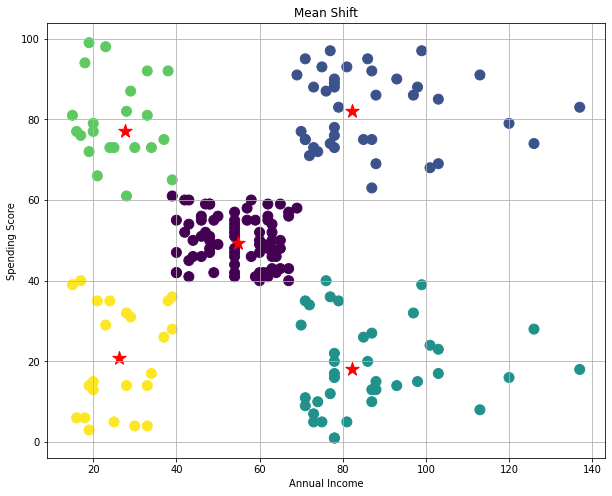

In [37]:
plt.figure(figsize=(10, 8))

plt.scatter(data['Annual Income (k$)'], 
            data['Spending Score (1-100)'], 
            c=labels_ms, s=100)

plt.scatter(centroids_ms[:,0], centroids_ms[:,1], color='red', marker='*', s=200) 

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Mean Shift')
plt.grid()
plt.show()

In [38]:
score_ms = metrics.silhouette_score(data,labels_ms)

print("Score of Mean Shift = ", score_ms)

Score of Mean Shift =  0.5513250428036423


OPTICS - Ordering Potins To Identify the Clustering Structure, it is a modified version of DBSCAN described above. 

In [39]:
model_op = OPTICS(eps=0.8, min_samples=10)
#
yhat_op = model_op.fit_predict(data)
clusters_op = unique(yhat_op)
print("Clusters of Mean Shift.",clusters_op)
labels_op = model_op.labels_

Clusters of Mean Shift. [-1  0  1  2  3  4  5  6]


In [40]:
score_op = metrics.silhouette_score(data,labels_op)

print("Score of Mean Shift = ", score_op)

Score of Mean Shift =  -0.04896818063864311


Special Clustering, it is a general class of clustering methods, draom from linear algebra

In [41]:
model_sc = SpectralClustering(n_clusters=5)
#
yhat_sc = model_sc.fit_predict(data)
clusters_sc = unique(yhat_sc)
print("Clusters of Mean Shift.",clusters_sc)
labels_sc = model_sc.labels_

Clusters of Mean Shift. [0 1 2 3 4]


In [42]:
score_sc = metrics.silhouette_score(data,labels_sc)

print("Score of Mean Shift = ", score_sc)

Score of Mean Shift =  0.2900916171834225


Gaussian Mixrture Mode, it summarizrs a meltivariate probability density function with a mixture of Gaussian probability distributions as its name suggests. 

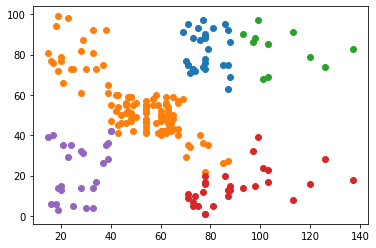

In [43]:
from numpy import where
data_X = data.iloc[:,[0,1]].values
model_gb = GaussianMixture(n_components=5)
model_gb.fit(data_X)
#
yhat_gb = model_gb.predict(data_X)
clusters_gb = unique(yhat_gb)
# create scatter plot for samples from each cluster
for cluster in clusters_gb:
	# get row indexes for samples with this cluster
	row_ix = where(yhat_gb == cluster)
	# create scatter of these samples
	plt.scatter(data_X[row_ix, 0], data_X[row_ix, 1])
# show the plot
plt.show()

Agglomerative Clustering, involves merging examples until the designed number of clusters is achieved.

In [44]:
model_agg = AgglomerativeClustering(n_clusters=5)
#
yhat_agg = model_agg.fit_predict(data)
clusters_agg = unique(yhat_agg)
print("Clusters of Mini Batch KMeans.",clusters_agg)
labels_agg = model_agg.labels_

Clusters of Mini Batch KMeans. [0 1 2 3 4]


In [45]:
score_agg = metrics.silhouette_score(data,labels_agg)

print("Score of Mean Shift = ", score_agg)

Score of Mean Shift =  0.5529945955148897


Reference - https://machinelearningmastery.com/clustering-algorithms-with-python/